# Assignment - 1 (EEDP Data Science Track)

So, First of all we will start with importing the dataset in to the file and checking if the data is accessible over the Jupyter Notebook. We do so using the `pandas` library of the python. For ensuring, this we will display a few rows of the dataset.

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('diabetes.csv')

# Display the first few rows of the dataset
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


### Define the type of variables that are there in the dataset

Looking at the dataset description, we can identify the following variables:

Pregnancies: Number of times pregnant (numeric)
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (numeric)
BloodPressure: Diastolic blood pressure (numeric)
SkinThickness: Triceps skin fold thickness (numeric)
Insulin: 2-Hour serum insulin (numeric)
BMI: Body mass index (numeric)
DiabetesPedigreeFunction: Diabetes pedigree function (numeric)
Age: Age (numeric)
Outcome: Class variable (0 or 1) - represents whether a patient has diabetes or not (categorical)
Note: All the numeric variables are continuous.

### Draw neat plots (histogram, box-plot, violin plot etc.) to explore each variable. Comment on summary statistics, what distribution variables follow, whether these distributions can be compared to any known distributions, are there any outliers

For this purpose, in order to draw these graphs we will start by importing 3 of the libraries we will be using to draw these graphs `matplotlib` and `seaborn`. 

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

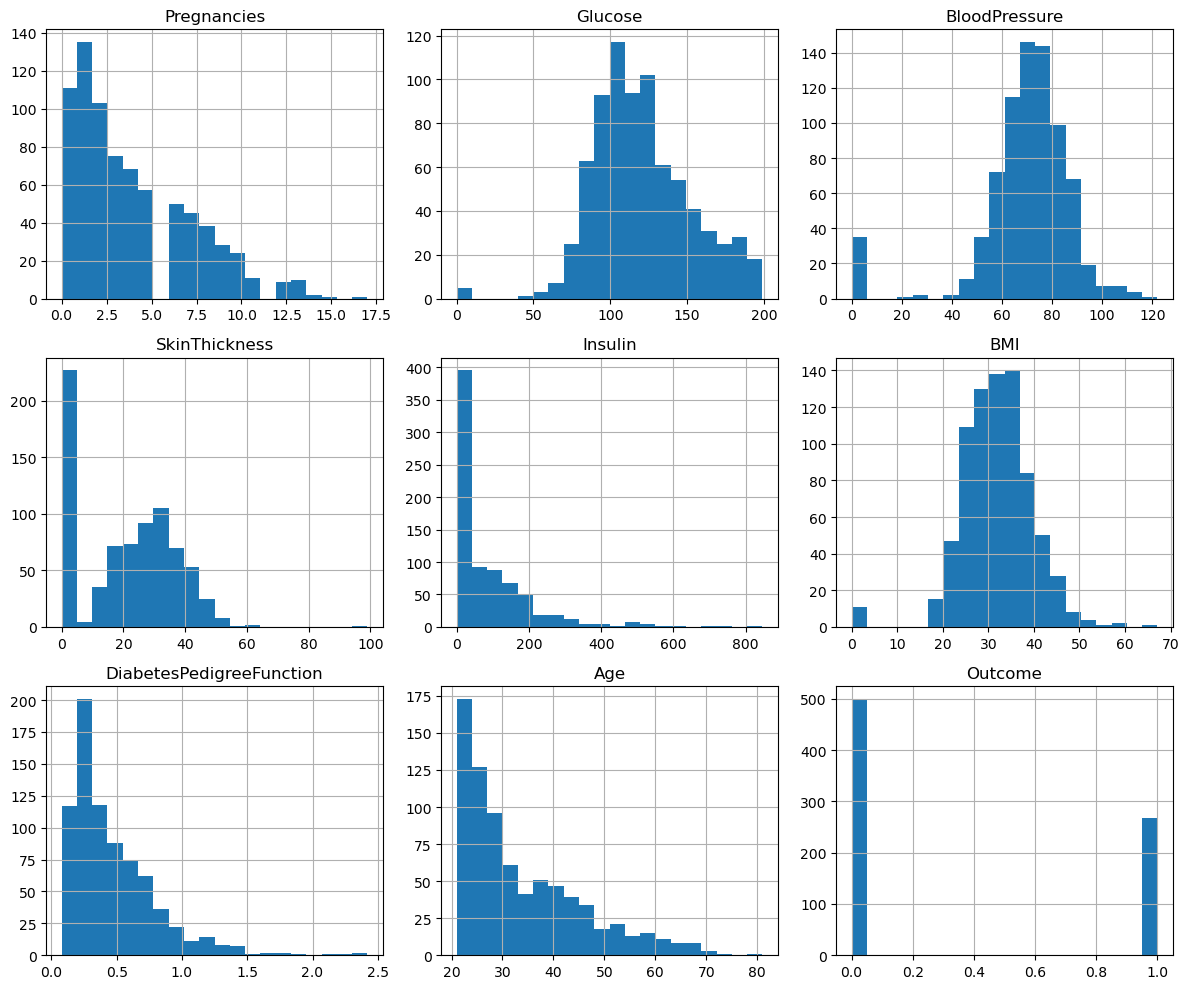

In [19]:
# Histogram for each variable
data.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

#### Histogram Analysis

- Pregnancies: Right-skewed, with a higher frequency of lower numbers of pregnancies and decreasing frequency as the number of pregnancies increases.
- Glucose: Unimodal, and has a symmetrical shape
- Blood Pressure: Unimodal, and has a symmetrical shape (but slighty right-skewed)
- SkinThickness: Right-skewed, with a higher frequency of lower skin thickness values and decreasing frequency as the thickness increases.
- Insulin: Right-skewed, with a higher frequency of lower insulin values and decreasing frequency as the insulin levels increase.
- BMI: Unimodal, and has a symmetrical shape
- DiabetesPedigreeFunction:  Right-skewed, with a higher frequency of lower pedigree function values and decreasing frequency as the values increase.
- Age: Right-skewed, with a higher frequency of younger ages and decreasing frequency as the age increases.

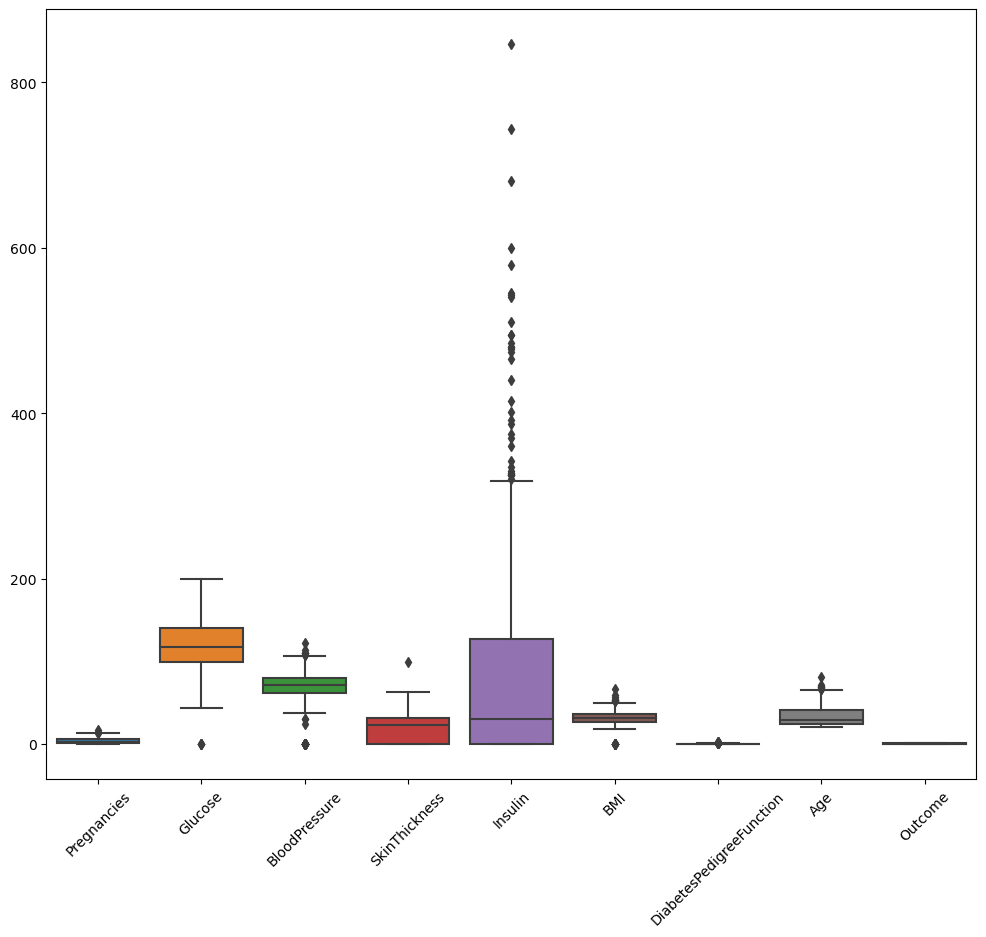

In [6]:
# Box plots for each variable
plt.figure(figsize=(12, 10))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.show()

#### Box Plot Analysis

`Pregnancies` and `Outcome`, do not have outliers, as indicated by the absence of points beyond the whiskers.
`Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`, `DiabetesPedigreeFunction`, and `Age` have outliers, with points extending beyond the whiskers.

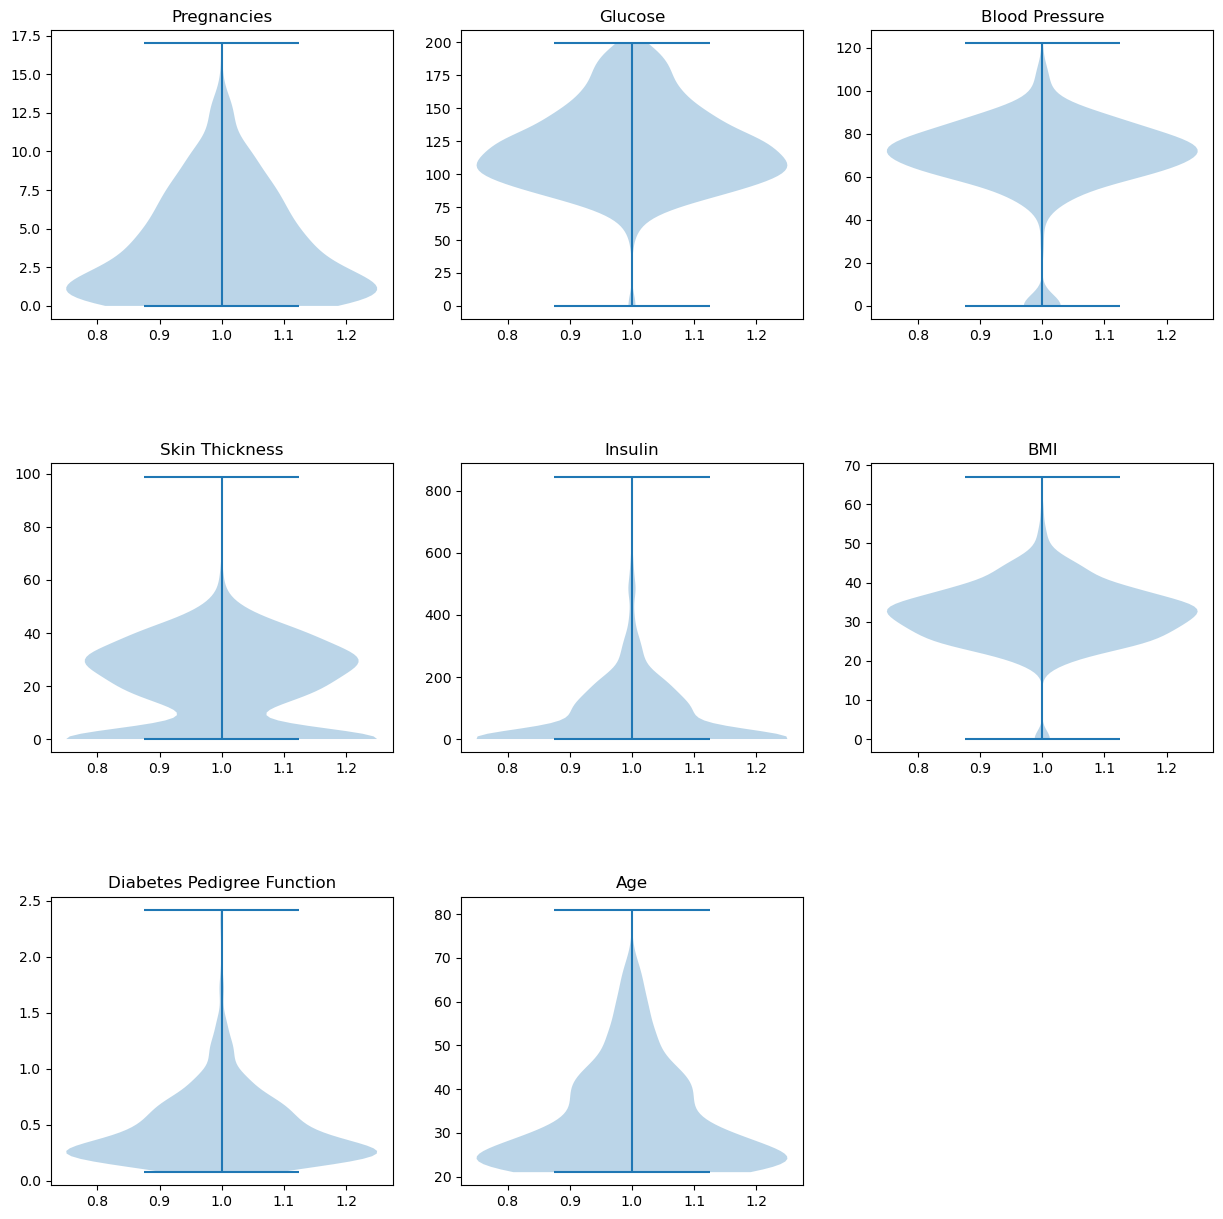

In [20]:
# Violin plots for each variable

fig, axs = plt.subplots(3,3, figsize=(15, 15))
plt.subplots_adjust(hspace=0.5)

# Violin plots
axs[0, 0].violinplot(data['Pregnancies'])
axs[0, 0].set_title('Pregnancies')

axs[0, 1].violinplot(data['Glucose'])
axs[0, 1].set_title('Glucose')

axs[0, 2].violinplot(data['BloodPressure'])
axs[0, 2].set_title('Blood Pressure')

axs[1, 0].violinplot(data['SkinThickness'])
axs[1, 0].set_title('Skin Thickness')

axs[1, 1].violinplot(data['Insulin'])
axs[1, 1].set_title('Insulin')

axs[1, 2].violinplot(data['BMI'])
axs[1, 2].set_title('BMI')

axs[2, 0].violinplot(data['DiabetesPedigreeFunction'])
axs[2, 0].set_title('Diabetes Pedigree Function')

axs[2, 1].violinplot(data['Age'])
axs[2, 1].set_title('Age')

fig.delaxes(axs[2, 2])

#### Violin Plot Analysis

`Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`, `DiabetesPedigreeFunction`, and `Age` show multiple peaks or modes in their distribution, suggesting the presence of distinct subgroups or clusters.

In [8]:
import scipy.stats as stats
import numpy as np

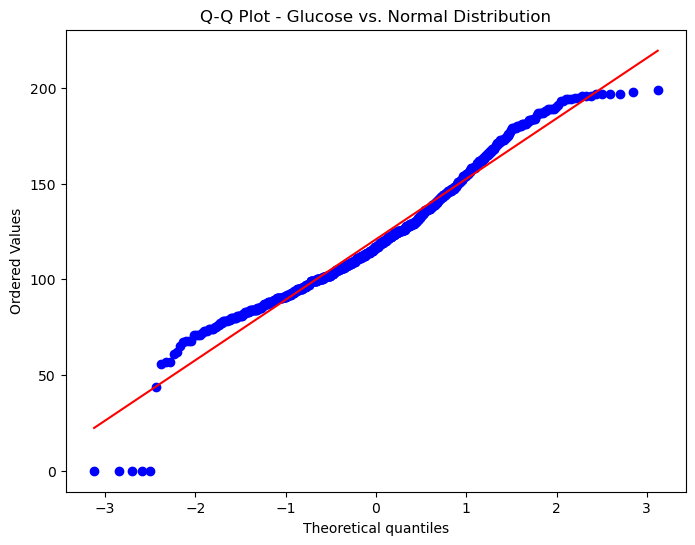

In [9]:
# Q-Q plot for 'Glucose' variable against normal distribution
plt.figure(figsize=(8, 6))
stats.probplot(data['Glucose'], dist='norm', plot=plt)
plt.title("Q-Q Plot - Glucose vs. Normal Distribution")
plt.show()

#### Q-Q Plot Analysis

- By comparing the data points on the Q-Q plot to the diagonal line, we can assess whether the 'Glucose' variable follows a normal distribution. If the data points closely follow the line, it suggests that the 'Glucose' variable is normally distributed. Deviations from the line indicate deviations from normality.

- The direction and pattern of deviations (e.g., points falling below or above the line) can provide insights into the specific nature of the departure from normality.

In [10]:
# Filter the dataset for Pima Indian Heritage females > 21
population = data[(data['Age'] > 21) & (data['Outcome'] == 1)]

# Calculate the sample proportion
sample_proportion = len(population) / len(data)

# Calculate the standard error
standard_error = np.sqrt(sample_proportion * (1 - sample_proportion) / len(data))

# Calculate the confidence interval (assuming normal approximation)
confidence_interval = stats.norm.interval(0.95, loc=sample_proportion, scale=standard_error)

# Print the results
print(f"Proportion of population with diabetes: {sample_proportion:.4f}")
print(f"95% Confidence Interval: {confidence_interval}")


Proportion of population with diabetes: 0.3424
95% Confidence Interval: (0.3088873083449713, 0.37600852498836207)


In [11]:
# Filter the dataset for females in the given age group
female_age_group = data[data['Age'] > 21]

# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(female_age_group['BMI'], 30.0)

# Print the results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


T-statistic: 8.1864
P-value: 0.0000


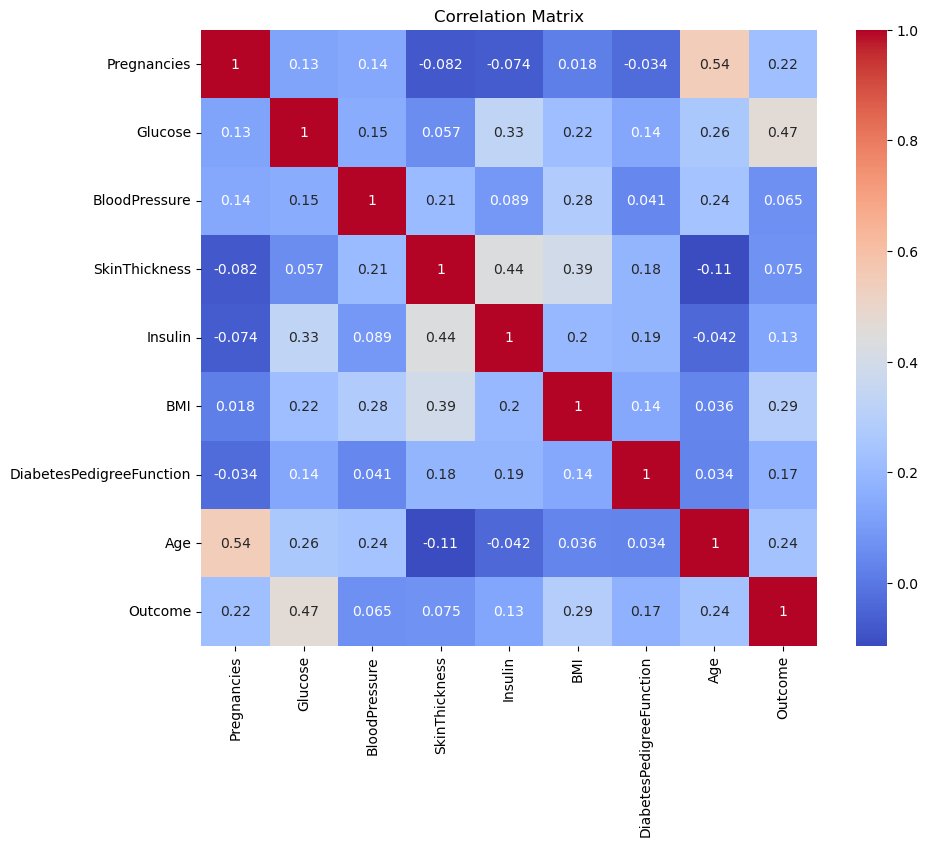

In [12]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()
